In [1]:
import time

import cv2
import matplotlib.pyplot as plt
import numpy as np
from paddleocr import PaddleOCR

In [2]:
def load_model(use_gpu=False, ocr_version="PP-OCRv3"):
    """
    Initialize and return a PaddleOCR model
    Args:
        use_gpu (bool): Whether to use GPU
    Returns:
        PaddleOCR model instance
    """
    return PaddleOCR(
        use_angle_cls=False,
        lang="en",
        use_gpu=use_gpu,
        ocr_version=ocr_version,
        show_log=True,
    )

In [3]:
def inference(model, image_path):
    """
    Perform OCR on an image and return detected text with positions
    Args:
        model: PaddleOCR model instance
        image_path (str): Path to the image file
    Returns:
        list: List of dictionaries containing:
            - text: The detected text string
            - confidence: Detection confidence score
            - bbox: Dictionary with x, y, width, height of the bounding box
    """
    start_time = time.time()
    ocr_results = model.ocr(image_path)
    inference_time = time.time() - start_time
    print(f"\nInference Time: {inference_time:.4f} seconds")

    detected_regions = []
    for text_regions in ocr_results:
        for region in text_regions:
            bbox_points, (text, confidence) = region
            points_array = np.array(bbox_points, dtype=np.float32)
            x, y, w, h = map(int, cv2.boundingRect(points_array))

            detected_regions.append(
                {
                    "text": text,
                    "confidence": confidence,
                    "bbox": {"x": x, "y": y, "width": w, "height": h},
                }
            )

    return detected_regions

def visualize_results(img: str, detected_text: list):
    img = plt.imread(img)

    plt.figure(figsize=(15, 15))
    plt.imshow(img)

    for item in detected_text:
        bbox = item["bbox"]
        x, y = bbox["x"], bbox["y"]
        w, h = bbox["width"], bbox["height"]

        plt.plot([x, x + w, x + w, x, x], [y, y, y + h, y + h, y], "r-", linewidth=2)

        plt.text(
            x,
            y - 5,
            f"{item['text']} ({item['confidence']:.2f})",
            bbox=dict(facecolor="white", alpha=0.7),
            fontsize=8,
        )

    plt.axis("off")
    plt.show()

[2024/10/30 13:00:56] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/dnth/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/dnth/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=

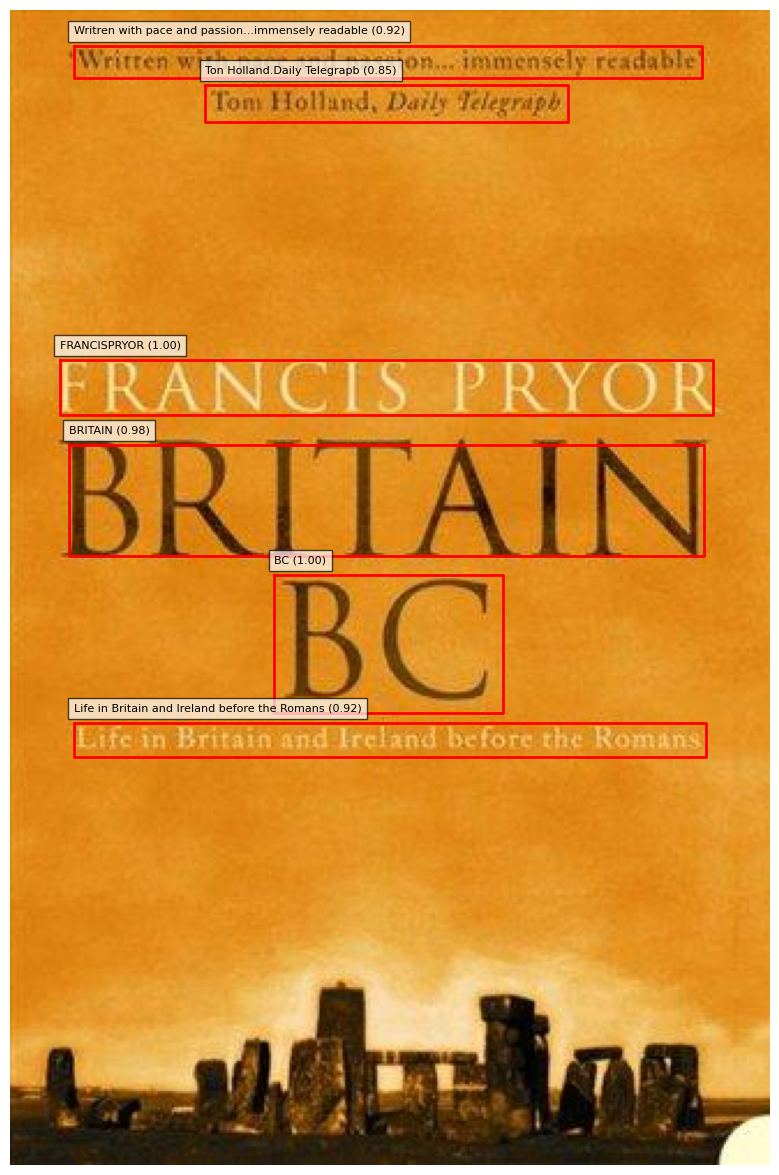

In [7]:
model = load_model(use_gpu=True, ocr_version="PP-OCRv4")

image_path = "../test_images/test_image_3.jpg"
detected_text = inference(model, image_path)
visualize_results(image_path, detected_text)


In [5]:
%%timeit
detected_text = inference(model, image_path)

[2024/10/30 12:58:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/30 12:58:40] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.011919736862182617
[2024/10/30 12:58:40] ppocr DEBUG: rec_res num  : 6, elapsed : 0.007805347442626953

Inference Time: 0.0233 seconds
[2024/10/30 12:58:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/30 12:58:40] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.009974479675292969
[2024/10/30 12:58:40] ppocr DEBUG: rec_res num  : 6, elapsed : 0.009273290634155273

Inference Time: 0.0226 seconds
[2024/10/30 12:58:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/30 12:58:40] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.014860391616821289
[2024/10/30 12:58:40] ppocr DEBUG: rec_res num  : 6, elapsed : 0.009763479232788086

Inference Time: 0.0290 seconds
[2024/1